In [29]:
print("Hello!, this is Implementation of Credit Card Fraud Detection")

Hello!, this is Implementation of Credit Card Fraud Detection


In [6]:
import pandas as pd

In [7]:
pip install pandas


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('creditcard.csv')
df.head()



Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [10]:
df.shape

(284807, 31)

In [11]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [13]:
import matplotlib.pyplot  as plt

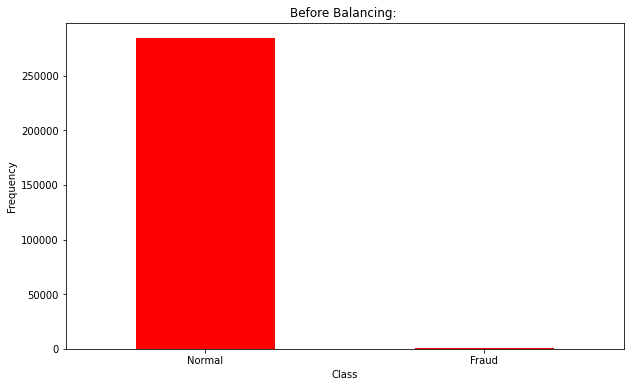

In [70]:
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0,color ='r',figsize = (10, 6))
plt.title("Before Balancing: ")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [74]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [75]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [76]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

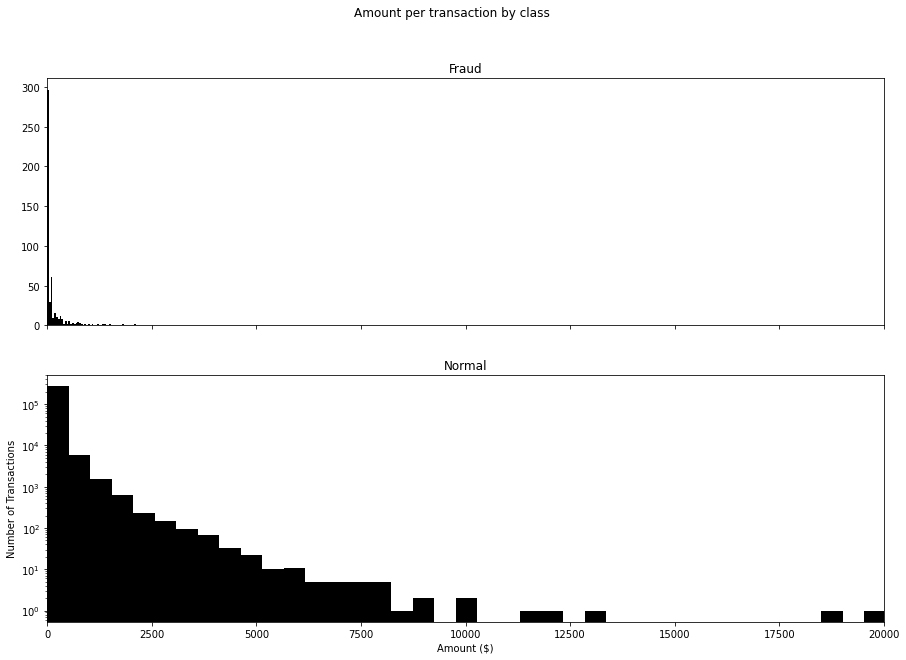

In [97]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize = (15, 10))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins,facecolor="black")
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins,facecolor="black")
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();


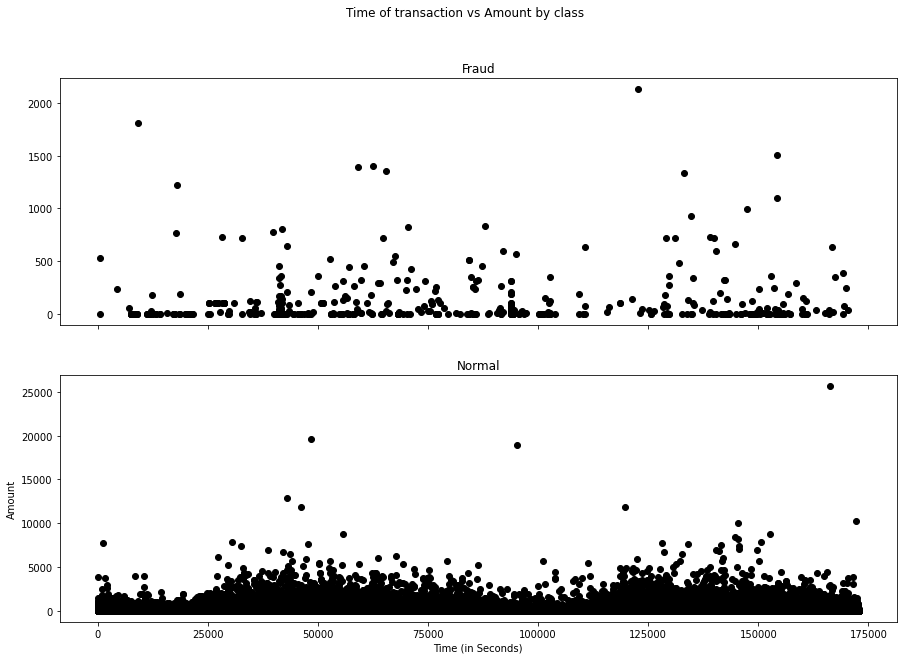

In [96]:
f,(ax1, ax2)= plt.subplots(2, 1,sharex=True, figsize = (15, 10))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,facecolor="black")
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount,facecolor="black")
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

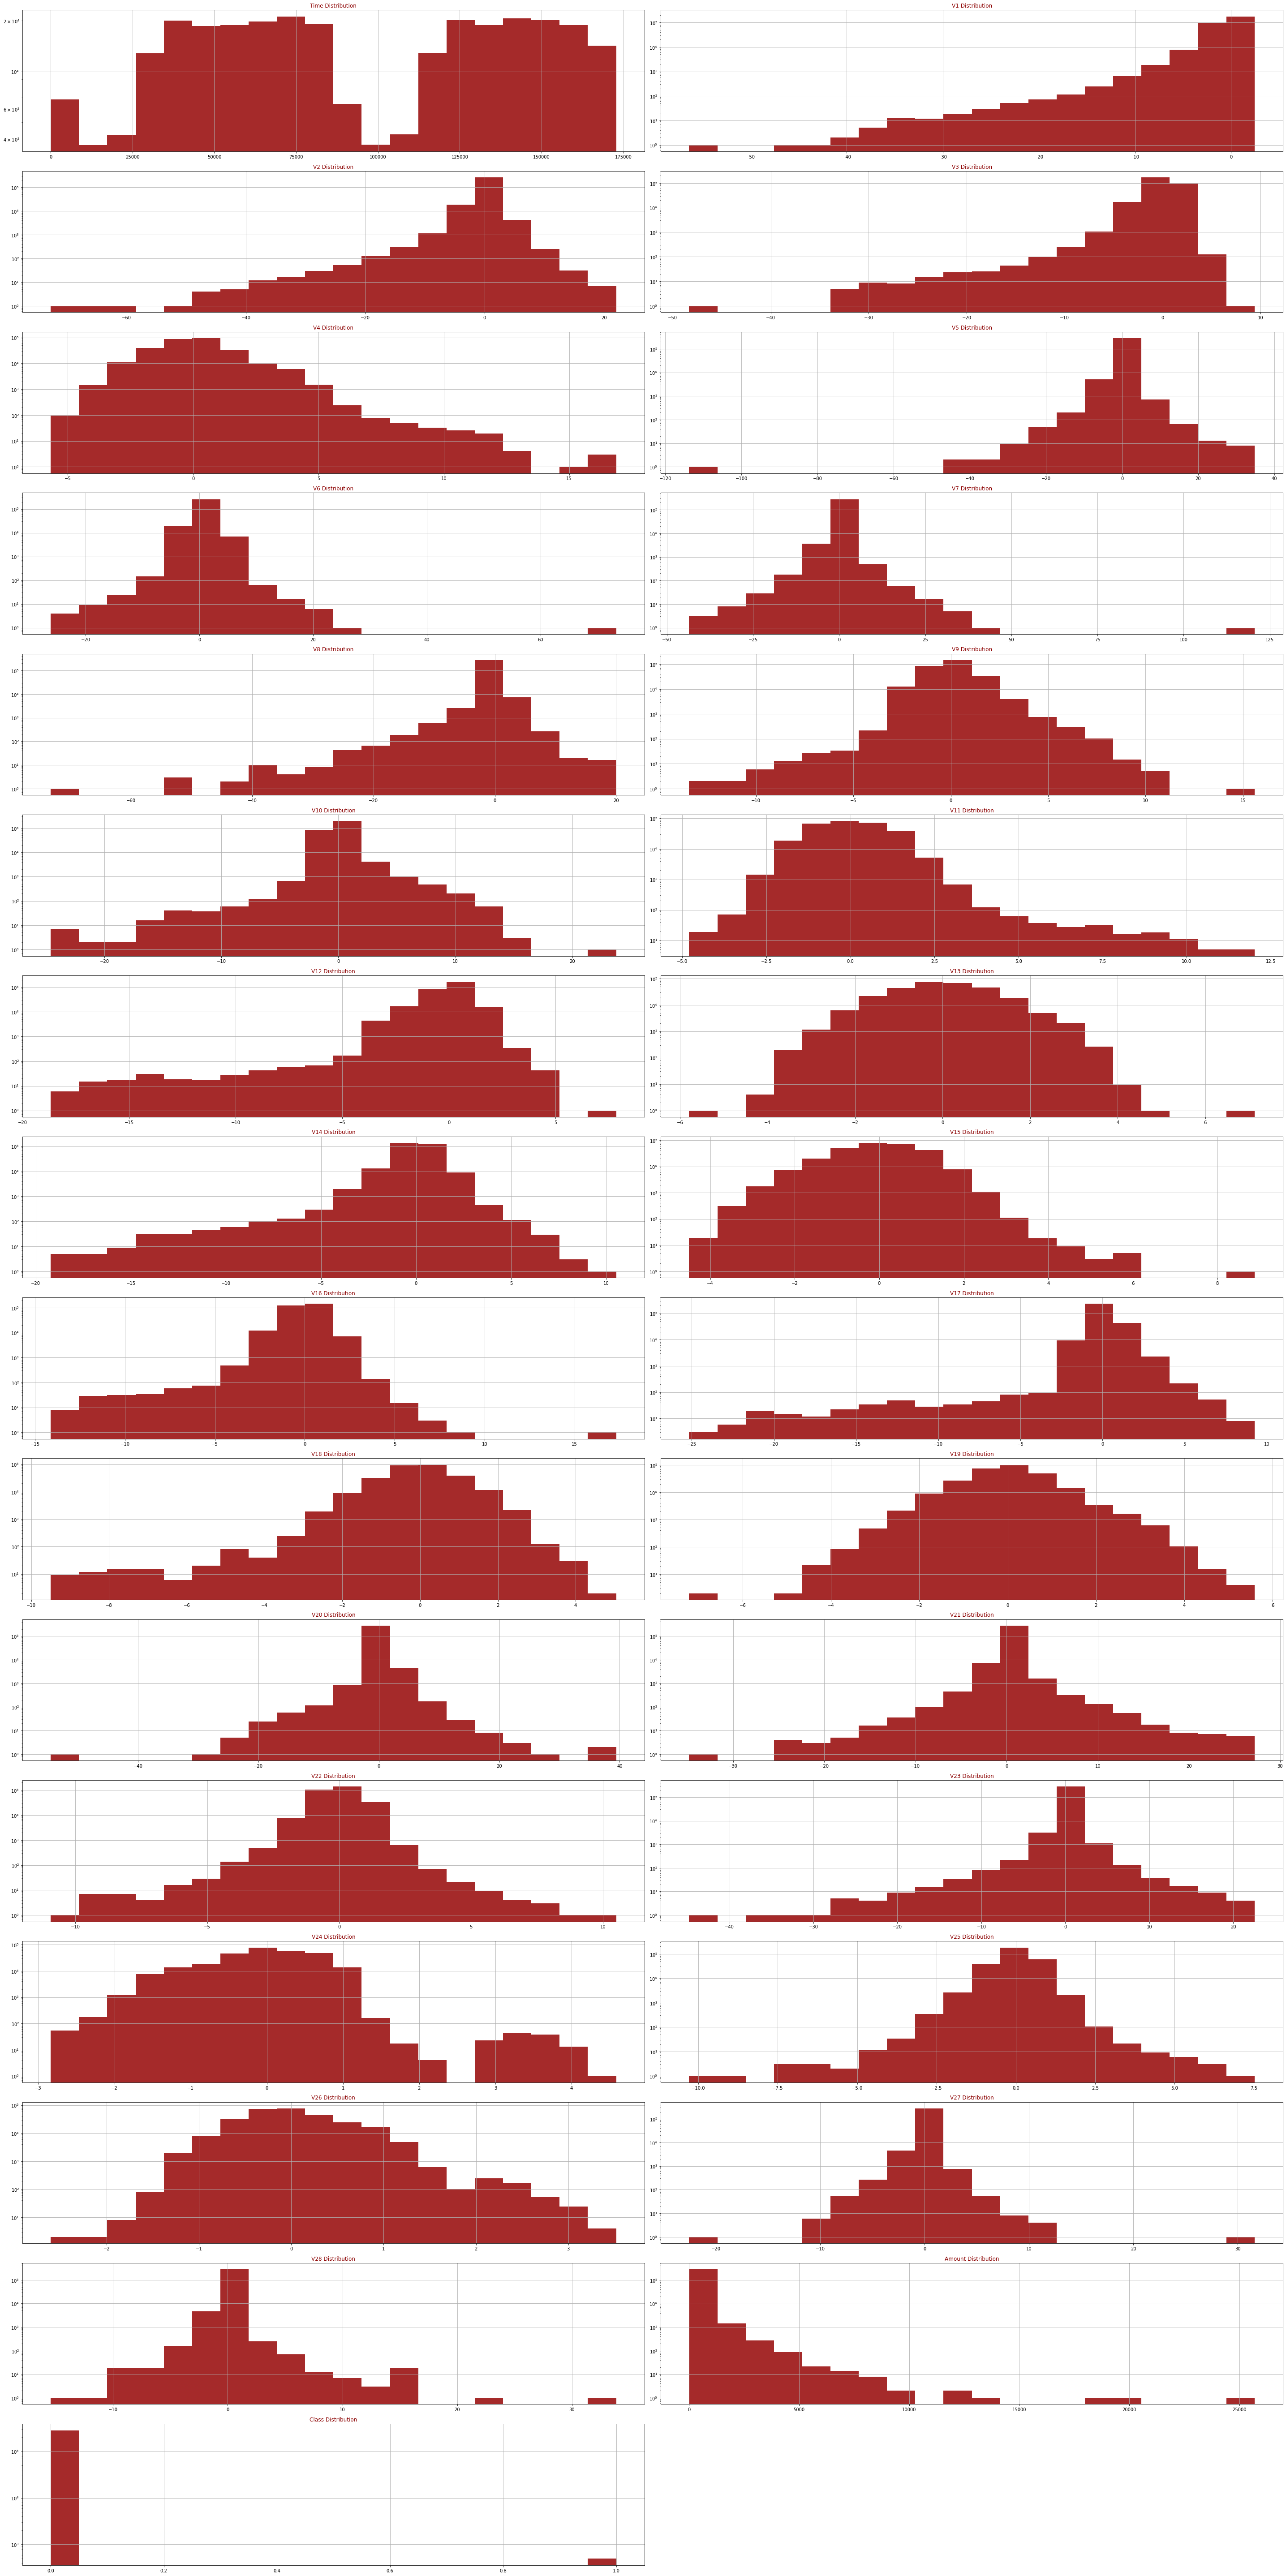

In [110]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(40,80))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='brown')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,16,2)

In [15]:
x=df.drop("Class",axis=1)
y=df.Class
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.50)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

c:\users\hpw\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0 0 0 ... 0 0 0]
[0 1]
[142150    254]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142170
           1       0.69      0.75      0.72       234

    accuracy                           1.00    142404
   macro avg       0.85      0.88      0.86    142404
weighted avg       1.00      1.00      1.00    142404



In [16]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)

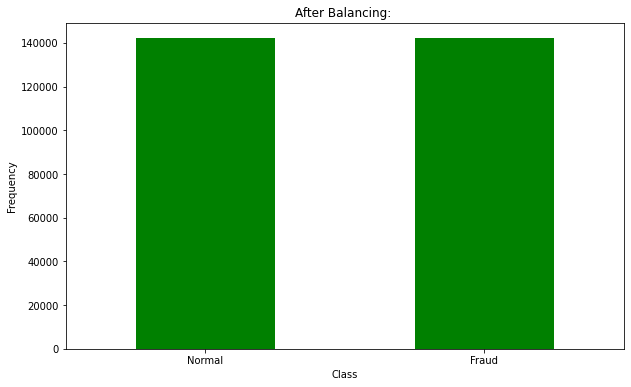

In [69]:
count_classes = pd.value_counts(y_train_ns, sort=True)
count_classes.plot(kind='bar', rot=0,color ='g',figsize = (10, 6))
plt.title("After Balancing: ")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [19]:
y_train_ns.value_counts()

0    142145
1    142145
Name: Class, dtype: int64

In [20]:
dataset=X_train_ns

In [21]:
dataset['Class']=y_train_ns

In [22]:
dataset

Time        V1        V2        V3        V4        V5  \
0       164427.000000 -0.770709  0.836693 -0.436762 -0.451554  0.060995   
1        43392.000000  1.159788  0.221882  0.311533  1.187003  0.139809   
2        93031.000000  2.049505  0.136876 -2.056468  0.101894  0.741594   
3       135469.000000  2.076872 -1.383382 -1.951998 -1.873209  1.269664   
4        63205.000000 -0.762722  0.382739  1.869724 -1.537020  0.246844   
...               ...       ...       ...       ...       ...       ...   
284285  152716.715960  0.143905  1.153161  0.526625  2.484465  1.285651   
284286    7555.035523 -0.063959  4.083451 -6.424225  6.123919  1.175757   
284287   84001.515660 -1.852937  1.824977 -6.585187  5.241422 -2.653698   
284288  134749.337574  1.079481  2.923778 -5.672536  5.327378  1.074603   
284289   64416.820604 -1.280373  2.479352 -0.768378  4.045715 -0.632336   

              V6        V7        V8        V9  ...       V21       V22  \
0      -1.118105  0.752018  0.351126  0.294305  ... -0.168631 -0.567790   
1       0.346563 -0.004929  0.115847 -0.049669  ... -0.068277  0.055868   
2      -1.252669  0.710930 -0.587457  1.136487  ...  0.057427  0.487761   
3       3.678852 -1.579413  0.943857 -0.034967  ...  0.344327  0.884070   
4       1.043877 -0.094721  0.559272  0.488515  ... -0.102379 -0.073101   
...          ...       ...       ...       ...  ...       ...       ...   
284285  0.404766  1.041961 -0.161268 -1.522172  ...  0.222919  0.702067   
284286 -2.477795 -1.791789  0.371484 -3.030663  ...  0.377883 -0.575071   
284287 -1.943072 -4.870887  1.215749 -4.233410  ...  1.331838 -0.696007   
284288 -1.986100 -0.986345  0.224301 -2.712067  ...  0.237130 -0.473292   
284289 -0.591029 -1.888245 -0.315486 -1.828577  ...  1.049530 -0.343807   

             V23       V24       V25       V26       V27       V28  \
0       0.066960 -0.172771  0.269858 -0.059965  0.080086 -0.020389   
1      -0.116755 -0.268961  0.702964 -0.311419  0.041527  0.002723   
2      -0.120909 -0.315888  0.440186  0.196026 -0.118646 -0.091095   
3       0.141216  0.743447 -0.124503 -0.071263  0.023150 -0.047716   
4      -0.313611 -1.214324 -0.037105  0.943232  0.272474  0.124624   
...          ...       ...       ...       ...       ...       ...   
284285 -0.191007  0.692276 -0.138256 -0.116449 -0.275677 -0.200339   
284286 -0.636230 -0.741090  1.521682  0.528368  0.710419  0.476220   
284287 -0.718753 -0.393018  0.629555  1.050208  1.222595  0.773154   
284288  0.058063  0.432946  0.224609  0.025769  0.450873  0.266418   
284289 -0.213769  0.121624 -0.060959  0.176154  0.596264  0.229442   

            Amount  Class  
0        89.740000      0  
1         1.000000      0  
2        37.870000      0  
3        49.900000      0  
4         1.000000      0  
...            ...    ...  
284285   28.419887      1  
284286    1.000000      1  
284287  476.166032      1  
284288   23.983128      1  
284289    0.972135      1  

[284290 rows x 31 columns]

In [28]:
dataset.Class.value_counts()

0    142145
1    142145
Name: Class, dtype: int64

In [79]:
x=dataset.drop("Class",axis=1)
y=dataset["Class"]
test_X=X_test
test_Y=y_test
test_Y.value_counts()

0    142170
1       234
Name: Class, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x,y)

LogisticRegression()

In [26]:
predictions = logmodel.predict(test_X)
print(predictions)
import numpy as np
unique_elements, counts_elements = np.unique(predictions, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 0 0 ... 0 0 0]
[0 1]
[138731   3673]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142170
           1       0.06      0.92      0.11       234

    accuracy                           0.98    142404
   macro avg       0.53      0.95      0.55    142404
weighted avg       1.00      0.98      0.99    142404

